In [1]:
from time import time
import matplotlib.pyplot as plt
 
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC
import pandas as pd
%matplotlib inline

In [2]:
print('Loading Data')
people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print('Done!')

Loading Data
Done!


In [3]:
# Find out how many faces we have, and
# the size of each picture from.
n_samples, h, w = people.images.shape

X = people.data
n_features = X.shape[1]

y = people.target
target_names = people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_images: %d " % n_samples)
print("n_features: %d " % n_features)
print("n_classes: %d " % n_classes)

Total dataset size:
n_images: 1288 
n_features: 1850 
n_classes: 7 


In [4]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
 
# Compute the PCA (eigenfaces) on the face dataset
n_components = 150
 
pca = RandomizedPCA(
    n_components=n_components, whiten=True).fit(X_train)
 
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)

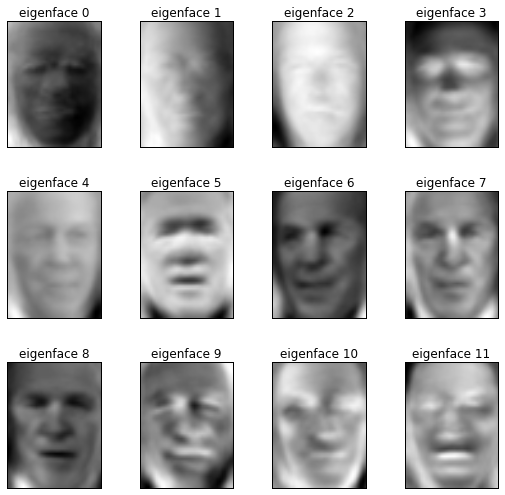

In [5]:
# A helper function to make plots of the faces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
 
# Plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
 
plot_gallery(eigenfaces, eigenface_titles, h, w)
 
plt.show()

In [6]:
#Train a SVM classification model
 
print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
 
# clf = GridSearchCV(
#     SVC(kernel='rbf', class_weight='balanced'), param_grid)
# clf = clf.fit(X_train_pca, y_train)
# print("done in %0.3fs" % (time() - t0))
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)


clf = SVC(C=1000.0, cache_size=200, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True )

clf = clf.fit(X_train_pca, y_train)

Fitting the classifier to the training set
[LibSVM]

C:\Users\bogdang\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [7]:
#Quantitative evaluation of the model quality on the test set
#Validate the data
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)
 
print(classification_report(
    y_test, y_pred, target_names=target_names))
 
print('Confusion Matrix')
#Make a data frame so we can have some nice labels
cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
df = pd.DataFrame(cm, columns = target_names, index = target_names)
print(df)

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.62      0.71        16
     Colin Powell       0.84      0.88      0.85        64
  Donald Rumsfeld       0.95      0.61      0.75        31
    George W Bush       0.80      0.95      0.87       131
Gerhard Schroeder       0.91      0.95      0.93        21
      Hugo Chavez       1.00      0.72      0.84        18
       Tony Blair       0.94      0.76      0.84        41

      avg / total       0.86      0.85      0.84       322

Confusion Matrix
                   Ariel Sharon  Colin Powell  Donald Rumsfeld  George W Bush  \
Ariel Sharon                 10             2                0              4   
Colin Powell                  0            56                1              6   
Donald Rumsfeld               2             0               19             10   
George W Bush                 0             7                0            124   
Gerhard Schroeder             0             

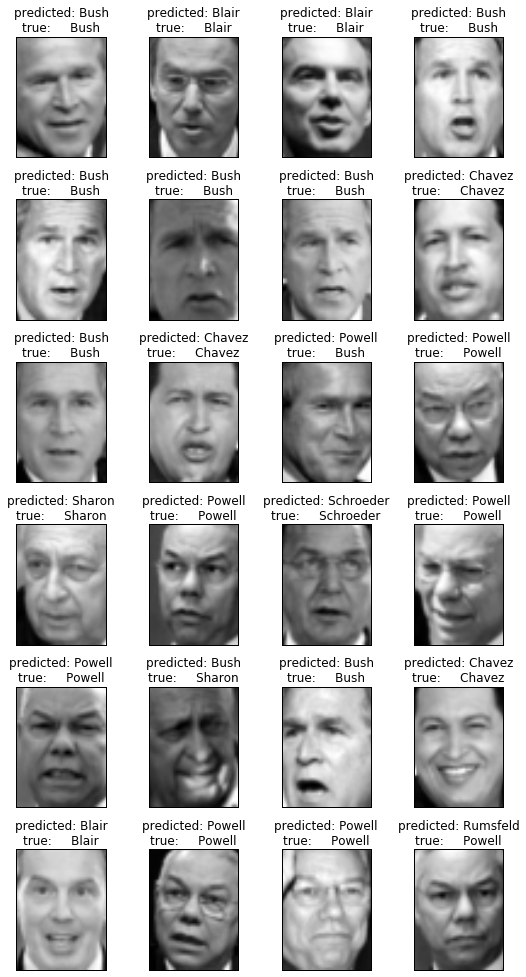

In [8]:
"Plot predictions on a portion of the test set"
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:     %s'%(pred_name, true_name)
 
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
 
plot_gallery(X_test, prediction_titles, h, w, 6, 4)

In [1]:
import cv2